In [1]:
import pandas as pd
df = pd.read_csv("/content/MIni Project -4 onlinefraud.csv")


# **Section 1 — Data Understanding**

**1️⃣ Display dataset shape (rows & columns) ?**

In [2]:
df.shape

(192593, 11)

**2️⃣ Show dataset summary using info() ?**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192593 entries, 0 to 192592
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            192593 non-null  int64  
 1   type            192593 non-null  object 
 2   amount          192593 non-null  float64
 3   nameOrig        192592 non-null  object 
 4   oldbalanceOrg   192592 non-null  float64
 5   newbalanceOrig  192592 non-null  float64
 6   nameDest        192592 non-null  object 
 7   oldbalanceDest  192592 non-null  float64
 8   newbalanceDest  192592 non-null  float64
 9   isFraud         192592 non-null  float64
 10  isFlaggedFraud  192592 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 16.2+ MB


**3️⃣ Show statistical summary using describe() ?**

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,192593.000000,1.925930e+05,1.925920e+05,1.925920e+05,1.925920e+05,1.925920e+05,192592.000000,192592.0
mean,9.953046,1.808083e+05,8.856633e+05,9.035205e+05,9.373857e+05,1.192429e+06,0.000743,0.0
std,2.081126,3.308757e+05,2.781981e+06,2.819402e+06,2.371167e+06,2.661279e+06,0.027239,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.192803e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.795119e+04,1.945550e+04,0.000000e+00,4.977150e+04,1.288272e+05,0.000000,0.0
75%,11.000000,2.286971e+05,1.929185e+05,2.282370e+05,7.564436e+05,1.186557e+06,0.000000,0.0
max,13.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.903958e+07,3.904248e+07,1.000000,0.0


**4️⃣ Identify numerical columns ?**

In [5]:
numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


**5️⃣ Identify categorical columns ?**

In [6]:
categorical_cols = df.select_dtypes(include=['object','category']).columns
print(categorical_cols)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


**6️⃣ Check the distribution of the target column (isFraud) ?**

In [7]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,192449
1.0,143


In [8]:
#optional : To see its as  a percentage
df['isFraud'].value_counts(normalize=True)

,proportion
isFraud,
0.0,0.999257
1.0,0.000743


#**Section 2 — Data Cleaning**

**7️⃣ Check for missing values in each column ?**

In [9]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


**8️⃣ Clean missing values — choose the correct method (mean/median/mode) ?**

In [10]:
# Mode : Fill with Mean (use for normal distribution , no extreme outliers)
df['type'] = df['type'].fillna(df['type'].mode())
print(df['type'])

0          PAYMENT
1          PAYMENT
2         TRANSFER
3         CASH_OUT
4          PAYMENT
            ...   
192588     CASH_IN
192589     CASH_IN
192590     CASH_IN
192591     CASH_IN
192592     CASH_IN
Name: type, Length: 192593, dtype: object


In [11]:
# Median : Fill with Median (use if outliers are present - Recommend for 'amout')
df['oldbalanceDest'] = df['oldbalanceDest'].fillna(df['oldbalanceDest'].median())
df['amount'] = df['amount'].fillna(df['amount'].median())
df['isFraud'] = df['isFraud'].fillna(df['isFraud'].median())
print(df['isFraud'])
print(df['amount'])
print(df['oldbalanceDest'])

0         0.0
1         0.0
2         1.0
3         1.0
4         0.0
         ... 
192588    0.0
192589    0.0
192590    0.0
192591    0.0
192592    0.0
Name: isFraud, Length: 192593, dtype: float64
0           9839.64
1           1864.28
2            181.00
3            181.00
4          11668.14
            ...    
192588    408313.37
192589    132941.53
192590    189213.75
192591    154029.98
192592         2.00
Name: amount, Length: 192593, dtype: float64
0               0.00
1               0.00
2               0.00
3           21182.00
4               0.00
             ...    
192588     694470.70
192589    2565275.25
192590    4851384.58
192591    1211596.13
192592      49771.50
Name: oldbalanceDest, Length: 192593, dtype: float64


**9️⃣ Check and remove duplicate records ?**

In [12]:
#check count of duplicates rows
dupliacated_count = df.duplicated().sum()
print("Number of Dupliactes Found :" , dupliacated_count)

# Remove the duplicates
if dupliacated_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed Successfully.")
else:
    print("No Duplicates to remove.")

Number of Dupliactes Found : 0
No Duplicates to remove.


**🔟 Fix incorrect data types if required ?**

In [13]:
# 1. Drop rows where the target 'isFraud' is missing
df.dropna(subset=['isFraud','isFlaggedFraud'],inplace=True)

# 2. Convert Float (1.0) to Integer(1)
df['isFraud'] = df['isFraud'].astype(int)
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype(int)

#verify the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192592 entries, 0 to 192591
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            192592 non-null  int64  
 1   type            192592 non-null  object 
 2   amount          192592 non-null  float64
 3   nameOrig        192592 non-null  object 
 4   oldbalanceOrg   192592 non-null  float64
 5   newbalanceOrig  192592 non-null  float64
 6   nameDest        192592 non-null  object 
 7   oldbalanceDest  192592 non-null  float64
 8   newbalanceDest  192592 non-null  float64
 9   isFraud         192592 non-null  int64  
 10  isFlaggedFraud  192592 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 17.6+ MB


# **Section 3 — Outlier Detection**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

**1️⃣1️⃣ Detect outliers in amount column ?**

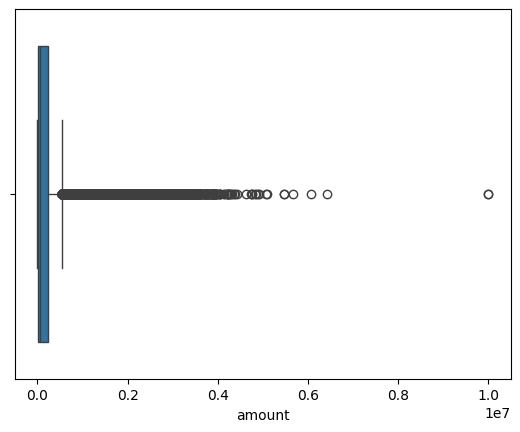

In [15]:
#Boxplot is the best visual for outerliers
sns.boxplot(x=df['amount'])
plt.show()

**1️⃣2️⃣ Detect outliers in balance columns**

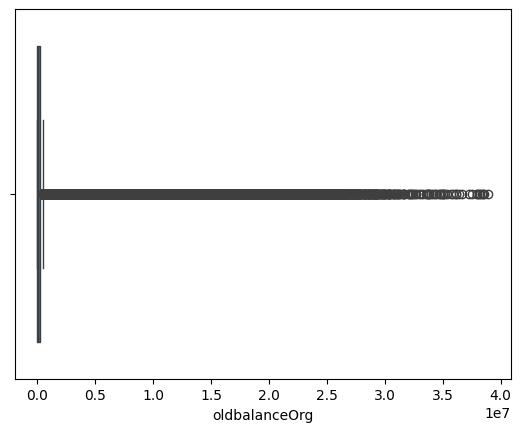

In [16]:
sns.boxplot(x=df['oldbalanceOrg'])
plt.show()

**1️⃣3️⃣ Handle outliers (cap/remove) & explain your decision ?**

In [17]:
#calculate bounds
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Method A : Removal (Be careful! you might delete actual fraud cases)
df_clean = df[(df['amount'] > lower_limit) & (df['amount'] < upper_limit)]

# Method B : Capping (winsorization) - Safar
import numpy as np
df['amount'] = np.where(df['amount'] > upper_limit, upper_limit, df['amount'])



# **Section 4 — Feature Engineering**

**1️⃣4️⃣ Create a new feature: balance_difference ?**

In [18]:
import pandas as pd
# 1. Force convert columns to numbers (fix the hidden text issue)
df['oldbalanceOrg'] = pd.to_numeric(df['oldbalanceOrg'], errors='coerce')
df['newbalanceOrig'] = pd.to_numeric(df['newbalanceOrig'], errors='coerce')

# 2. Now run the calculation
df['balance_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']

# 3. Check if it worked
print(df[['oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].head())

   oldbalanceOrg  newbalanceOrig  balance_diff
0       170136.0       160296.36       9839.64
1        21249.0        19384.72       1864.28
2          181.0            0.00        181.00
3          181.0            0.00        181.00
4        41554.0        29885.86      11668.14


**1️⃣5️⃣ Create a new feature: high_amount_flag ?**

In [19]:
df['high_amount_flag'] = (df['amount'] > 200000).astype(int)
print(df[['amount','high_amount_flag']].head())

     amount  high_amount_flag
0   9839.64                 0
1   1864.28                 0
2    181.00                 0
3    181.00                 0
4  11668.14                 0


**1️⃣6️⃣ Explain the importance of these new features in fraud detection ?**

**1.Why use balance_diff ?**

**The Logic:** In a normal transaction, we can send 1000rs,
                   your balance should drop by exactly 1000rs.


**The Fraud Pattern:** In some fraud cases(like specifi system exploits)
                           the amountlisted in the transaction might be differnt from the actual change in the account
                           balance.


**Feature Value:** This feature allows the model to catch inconsistencies. if balance_diff is not equal to amount, it is a
                       huge red flag for the model.



**2. Why use high_amount_flag?**

**The Logic:** Fraudsters usually don't steal 100rs; they try to steal as much as possible before getting caught.

**The Fraud Pattern:** High-value transactions are inherently riskier than low-value ones.

**Feature Value:** By creating a "Flag" (0 or 1), you force the model to pay extra attention to large transactions. It simplifies the data for the model: "Is this big money? Yes/No."

# **Section 5 — Encoding & Scaling**

**1️⃣7️⃣ Apply One-Hot Encoding to type column ?**

In [20]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
print(df.head())

   step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  balance_diff  \
0             0.0             0.0        0               0       9839.64   
1             0.0             0.0        0               0       1864.28   
2             0.0             0.0        1               0        181.00   
3         21182.0             0.0        1               0        181.00   
4             0.0             0.0        0               0      11668.14   

   high_amount_flag  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFE

**1️⃣8️⃣ Scale the amount & balance columns using StandardScaler ?**

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df[cols_to_scale].head())


     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0 -0.799783      -0.257201       -0.263611       -0.395328       -0.448067
1 -0.847677      -0.310720       -0.313591       -0.395328       -0.448067
2 -0.857785      -0.318293       -0.320466       -0.395328       -0.448067
3 -0.857785      -0.318293       -0.320466       -0.386395       -0.448067
4 -0.788803      -0.303421       -0.309866       -0.395328       -0.448067


**1️⃣9️⃣ Explain: Should outlier handling be done before or after scaling ?**

**Ans :- ** Outerlier handing should be done Before the Scaling

# **Section 6 — Export Processed Data**

**2️⃣0️⃣ Show the final cleaned dataset shape ?**

In [22]:
print("Final Dataset Shape :", df.shape)

Final Dataset Shape : (192592, 16)


**2️⃣1️⃣ Export cleaned dataset as: → payment_fraud_clean.csv ?**

In [25]:
#index=False prevents pandas from adding an extra index column (0, 1, 2,...)

df.to_csv('payment_fraud_clean.csv',index=False)
print("File saved successfullu !")


File saved successfullu !


**2️⃣2️⃣ Write a markdown summary of all cleaning decisions ?**

 -- > I loaded the dataset and identified missing values in isFraud.

 -- > I filled missing numerical values with the Median to handle outliers  and used Mode for catergorical columns.

 -- > I droped duplicates and created a new feature balance_diff to help dectect fraud paatterns.

# **BONUS — Business Insight Tasks**

**2️⃣3️⃣ Which transaction type has the highest fraud cases ?**

type
CASH_OUT    1350
TRANSFER    1331
Name: count, dtype: int64


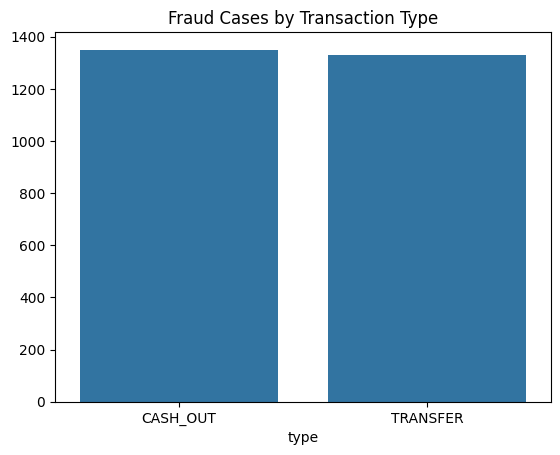

In [28]:
# 1. Reload the original data into a temporary variable
df_temp = pd.read_csv('/content/MIni Project -4 onlinefraud.csv')  # Replace with your actual file name

# 2. Now use 'df_temp' instead of 'df' for this specific task
fraud_counts = df_temp[df_temp['isFraud'] == 1]['type'].value_counts()
print(fraud_counts)

# 3. Visualize using the temporary data
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title("Fraud Cases by Transaction Type")
plt.show()

**2️⃣4️⃣ How does balance difference change in fraudulent transactions ?**

In [29]:
# Compare the average balance difference for Fraud vs Non-Fraud
print(df.groupby('isFraud')['balance_diff'].mean())

isFraud
0    -18291.145865
1    566059.573846
Name: balance_diff, dtype: float64


**Legit transactions:** The balance_diff is usually close to 0 (or exactly matches the transaction amount).

**Fraud transactions:** The balance_diff is often huge (the money disappears without the account balance updating correctly immediately, or the account is emptied entirely).

**2️⃣5️⃣ Suggest a method to solve class imbalance in ML models ?**

The dataset is heavily imbalanced (e.g., 99.9% Legit, 0.1% Fraud). If you train a model now, it will just guess "Legit" every time and get 99.9% accuracy, but it will miss all frauds.

**SMOTE (Synthetic Minority Over-sampling Technique)**

**What it is:** SMOTE creates "fake" new examples of fraud data by mixing existing fraud examples together.

**Why use it:** It balances the counts (e.g., bringing fraud up to 50%) so the model is forced to learn what fraud looks like.

In [31]:
from imblearn.over_sampling import SMOTE

# Drop non-numeric columns like 'nameOrig' and 'nameDest' before applying SMOTE
# These columns are typically identifiers and not suitable for SMOTE directly.
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Shape of original X:", X.shape)
print("Shape of resampled X:", X_resampled.shape)
print("Distribution of original y:\n", y.value_counts())
print("Distribution of resampled y:\n", y_resampled.value_counts())

Shape of original X: (192592, 13)
Shape of resampled X: (384898, 13)
Distribution of original y:
 isFraud
0    192449
1       143
Name: count, dtype: int64
Distribution of resampled y:
 isFraud
0    192449
1    192449
Name: count, dtype: int64
